In [1]:
# importing libraries
import tensorflow as tf;
from tensorflow import keras;
import matplotlib.pyplot as plt;
import numpy as np;
from keras import layers
from keras.models import Model
from keras.datasets import cifar10
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Load dataset
dataset = cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [3]:

# Test train split
(x_train, y_train), (x_test, y_test) = dataset;
# Data Preprocessing --> Normalization
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0
x_train = np.reshape(x_train, (len(x_train), 32, 32, 3))
x_test = np.reshape(x_test, (len(x_test), 32, 32, 3))
# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))


Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


In [4]:
input_img = keras.Input(shape=(32, 32, 3))


x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)   # 32x32x16
x = layers.MaxPooling2D((2, 2))(x)                            # 16x16x16
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)            # 16x16x8
x = layers.MaxPooling2D((2, 2))(x)                            # 8x8x8
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)            # 8x8x8
encoded = layers.MaxPooling2D((2, 2))(x)                      # 4x4x8

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)     # 4x4x8 
x = layers.UpSampling2D((2, 2))(x)                                           # 8x8x8
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)           # 8x8x8
x = layers.UpSampling2D((2, 2))(x)                                           # 16x16x8
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)                          # 16x16x16
x = layers.UpSampling2D((2, 2))(x)                                           # 32x32x16 
decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)  # 32x32x3

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error' , metrics=["accuracy"])


In [20]:
print(decoded.shape)
autoencoder.summary()

(None, 32, 32, 3)
Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_28 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 16, 16, 8)         1160      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 8, 8, 8)          0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 8, 8,

In [5]:

history = autoencoder.fit(x_train, x_train,epochs=10, batch_size=400, validation_data=(x_test,x_test))

Epoch 1/10
125/125 [==============================] - 18s 50ms/step - loss: 0.0315 - accuracy: 0.4963 - val_loss: 0.0168 - val_accuracy: 0.6163
Epoch 2/10
125/125 [==============================] - 6s 47ms/step - loss: 0.0149 - accuracy: 0.6281 - val_loss: 0.0130 - val_accuracy: 0.6458
Epoch 3/10
125/125 [==============================] - 6s 50ms/step - loss: 0.0130 - accuracy: 0.6803 - val_loss: 0.0117 - val_accuracy: 0.7131
Epoch 4/10
125/125 [==============================] - 6s 48ms/step - loss: 0.0115 - accuracy: 0.7115 - val_loss: 0.0112 - val_accuracy: 0.7247
Epoch 5/10
125/125 [==============================] - 6s 48ms/step - loss: 0.0108 - accuracy: 0.7267 - val_loss: 0.0102 - val_accuracy: 0.7418
Epoch 6/10
125/125 [==============================] - 6s 49ms/step - loss: 0.0101 - accuracy: 0.7363 - val_loss: 0.0096 - val_accuracy: 0.7416
Epoch 7/10
125/125 [==============================] - 6s 48ms/step - loss: 0.0097 - accuracy: 0.7419 - val_loss: 0.0099 - val_accuracy: 0.720

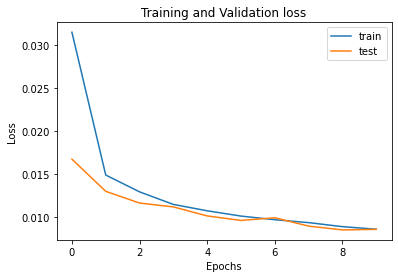

In [6]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [7]:
predicted = autoencoder.predict(x_test)

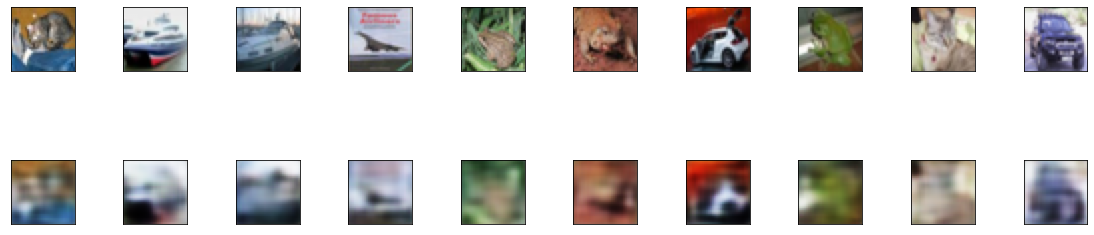

In [8]:
plt.figure(figsize=(40,4))
for i in range(10):
    # display original images
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test[i].reshape(32, 32,3))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    

    
    # display reconstructed images
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(32, 32,3))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  
    
plt.show()